In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.data' , header=None)
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values
df.columns=['Classlabel', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinityofash', 'Magnesium', 
'Totalphenols', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins', 'Colorintensity', 'Hue', 'ofdilutedwines', 'Proline']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=0 , stratify = y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std , y_train)

lr = LogisticRegression()
lr = lr.fit(X_train_lda , y_train)


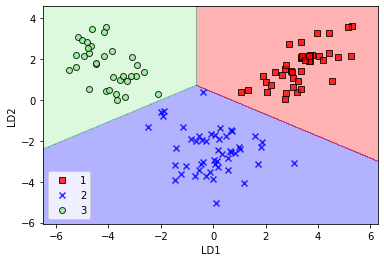

In [4]:
from funzioni_utili import plot_dec_reg
import matplotlib.pyplot as plt
plot_dec_reg(X_train_lda , y_train , classifier = lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 124 but corresponding boolean dimension is 54

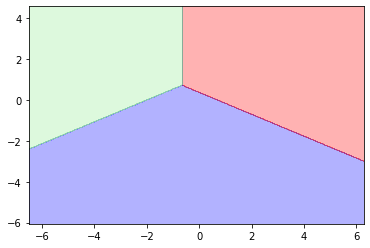

In [5]:
X_test_lda =lda.transform(X_train_std)
plot_dec_reg(X_test_lda , y_test , classifier = lr)
plt.xlabel('LD1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.show()